<a href="https://colab.research.google.com/github/ConfusedTraveler/credit_card_fraud_detection/blob/main/credit_card_fraud_detection_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Related Libraries and Settings

In [ ]:
import numpy as np
import scipy as sp
from  scipy.stats import boxcox
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

# Exploratory Data Analysis

to get an general understanding of the data and its underlying structure

In [ ]:
# 导入数据
transactions = pd.read_csv('/content/drive/MyDrive/credit_card_fraud_detection/data/creditcard.csv')

In [ ]:
transactions.shape

(284807, 31)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

没有缺失值，都是数值特征

In [ ]:
# Does dataset has duplicates?

In [ ]:
transactions.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42214,40999.0,-0.366181,0.879170,1.611511,0.293202,0.449004,-0.744636,1.022646,-0.351936,-1.086869,0.036121,1.692852,0.943914,0.707119,0.208352,0.181573,-0.365983,-0.339687,0.079943,0.948340,0.213240,0.068904,0.362236,-0.250765,0.599350,-0.033889,0.370945,-0.109776,-0.122929,7.24,0
212585,138917.0,1.946935,-0.714386,-2.599527,-0.804849,2.200176,3.498501,-0.574757,0.816856,0.991576,-0.201703,-0.297472,0.534247,-0.303466,0.263494,-0.011420,-0.718994,-0.128253,-0.551460,0.134087,-0.078721,0.104377,0.410753,0.034652,0.765425,0.219740,0.210557,-0.015705,-0.061165,50.00,0
247231,153509.0,-0.471464,-0.343925,1.538263,-2.610951,-0.689654,-0.682957,0.017206,-0.157027,-2.347242,0.540650,-1.115238,-1.184863,0.415405,-0.564140,-0.468423,-0.725556,0.551421,0.021325,-0.279701,-0.247197,-0.052747,0.242785,-0.395801,-0.009187,0.701455,0.058973,0.033114,0.049652,28.00,0
195664,131167.0,1.846945,-1.670201,-1.400507,-2.868925,-0.490449,0.549496,-0.803812,0.211284,1.017214,-0.505667,1.399948,1.765338,0.644261,0.260483,1.189854,-3.188006,0.634041,0.505300,-0.537707,-0.465303,-0.115298,0.324264,0.133030,-1.348619,-0.234437,-0.752894,0.114890,-0.045317,110.43,0
247160,153482.0,-0.365272,0.506665,0.855743,-0.874596,0.324490,0.607664,0.146596,0.237725,0.634537,-0.496537,0.020632,0.440472,-0.332569,-0.112666,-0.553827,0.329110,-0.995292,0.986970,0.046886,-0.209075,0.370408,1.124770,-0.111923,0.234814,-0.763314,-0.391102,-0.002512,0.210120,13.53,0


In [ ]:
print('Number of legitimate transactions:',transactions['Class'].value_counts()[0])
print('Number of fraudulent transactions:',transactions['Class'].value_counts()[1])
print('Legitimate transactions:',round(transactions['Class'].value_counts()[0]/len(transactions)*100,3),'% of the dataset')
print('Fraudulent transactions:',round(transactions['Class'].value_counts()[1]/len(transactions)*100,3),'% of the dataset')

Number of legitimate transactions: 284315
Number of fraudulent transactions: 492
Legitimate transactions: 99.827 % of the dataset
Fraudulent transactions: 0.173 % of the dataset


In [ ]:
# Picture: Volume of legitimate transactions and fraudulent transactions

In [ ]:
# Picture: Value of legitimate transactions and fraudulent transactions

# Data Preparation

## feature engineering
* 处理time和amount这两个特征，其他特征已经使用PCA处理过


In [ ]:
transactions['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [ ]:
transactions['Time'] = transactions['Time'] / 3600

In [ ]:
transactions['Time'].describe()

count    284807.000000
mean         26.337183
std          13.191152
min           0.000000
25%          15.055972
50%          23.525556
75%          38.700139
max          47.997778
Name: Time, dtype: float64

plot a histogram of transaction times, with one bin per hour

Text(0.5, 1.0, 'Transaction Times')

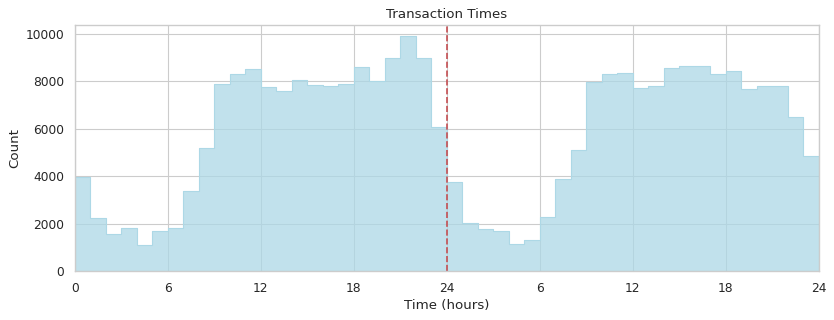

In [ ]:
# picture: time分布
plt.figure(figsize=(12,4), dpi=80)
sns.histplot(transactions['Time'], bins=48, element='step', color='lightblue')
plt.xlim([0,48])
plt.xticks(np.arange(0,49,6), np.hstack((np.arange(0, 30, 6), np.arange(6, 30, 6))).astype(str))
plt.axvline(x=24, color='r', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Transaction Times')

In [ ]:
transactions['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

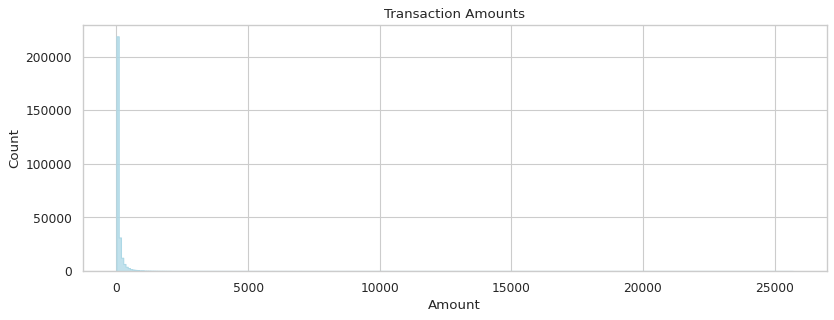

In [ ]:
# picture: amount分布
plt.figure(figsize=(12,4), dpi=80)
sns.histplot(transactions['Amount'], bins=300, element='step', color='lightblue')
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

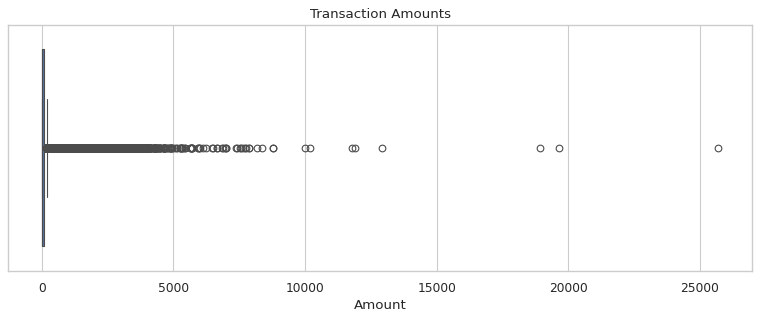

In [ ]:
# The histogram is hard to read due to some outliers we can't see. A boxplot will show the outliers.
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x=transactions['Amount'])
plt.title('Transaction Amounts')

We can see there are no outliers on the left and many outliers on the right.So the amounts certainly seem right-skewed.

In [ ]:
transactions['Amount'].skew()

16.977724453761024

amount最小值是0

In [ ]:
transactions['Amount'] = transactions['Amount'] + 1e-9

In [ ]:
transactions['Amount'], maxlog, (min_ci,max_ci) = boxcox(transactions['Amount'], alpha=0.01)

In [ ]:
maxlog

0.13392240552999146

In [ ]:
(min_ci,max_ci)

(0.132621597858576, 0.13523057944346129)

Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

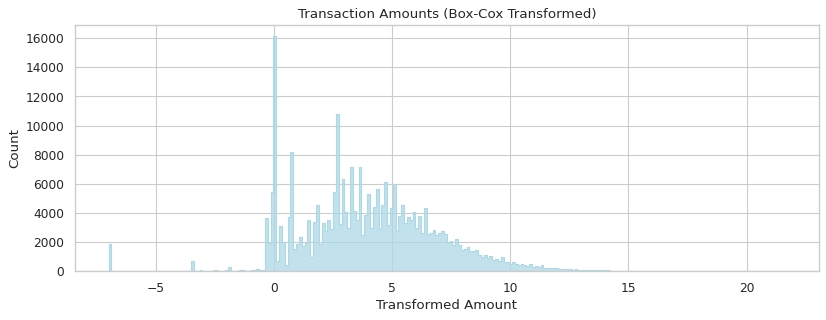

In [ ]:
# picture: transformed amount分布
plt.figure(figsize=(12,4), dpi=80)
sns.histplot(transactions['Amount'], element='step', color='lightblue')
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [ ]:
transactions['Amount'].describe()

count    284807.000000
mean          3.977690
std           2.961936
min          -7.001590
25%           1.937710
50%           3.829056
75%           5.896318
max          21.621106
Name: Amount, dtype: float64

In [ ]:
transactions['Amount'].skew()

0.1153579081322187

## feature selection

### heatmap

<Axes: title={'center': 'features correlation plot'}>

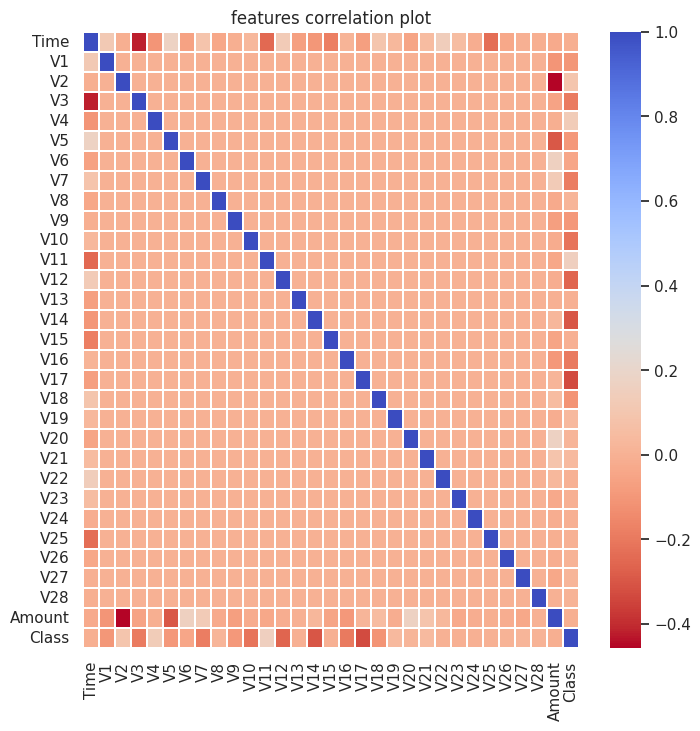

In [ ]:
plt.figure(figsize = (8,8))
plt.title('features correlation plot')
corr = transactions.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="coolwarm_r")

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (inverse correlation with V2 and V5).
但根据相关系数，各变量之间的相关性都不是特别强

In [ ]:
print(corr['Time'])

Time      1.000000
V1        0.117396
V2       -0.010593
V3       -0.419618
V4       -0.105260
V5        0.173072
V6       -0.063016
V7        0.084714
V8       -0.036949
V9       -0.008660
V10       0.030617
V11      -0.247689
V12       0.124348
V13      -0.065902
V14      -0.098757
V15      -0.183453
V16       0.011903
V17      -0.073297
V18       0.090438
V19       0.028975
V20      -0.050866
V21       0.044736
V22       0.144059
V23       0.051142
V24      -0.016182
V25      -0.233083
V26      -0.041407
V27      -0.005135
V28      -0.009413
Amount   -0.024570
Class    -0.012323
Name: Time, dtype: float64


In [ ]:
print(corr['Amount'])

Time     -0.024570
V1       -0.107079
V2       -0.457156
V3       -0.054582
V4       -0.012634
V5       -0.293445
V6        0.162356
V7        0.124091
V8       -0.027455
V9       -0.075074
V10      -0.023171
V11      -0.039688
V12      -0.013272
V13      -0.002986
V14       0.024897
V15      -0.050833
V16      -0.093714
V17       0.020111
V18       0.045358
V19      -0.015020
V20       0.164886
V21       0.085882
V22       0.028710
V23      -0.034159
V24      -0.013889
V25      -0.009619
V26      -0.018573
V27      -0.038343
V28       0.001622
Amount    1.000000
Class    -0.010656
Name: Amount, dtype: float64


In [ ]:
print(corr['Class'])

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount   -0.010656
Class     1.000000
Name: Class, dtype: float64


Class: inverse correlation with V14 and V17，但相关性也不是特别强

## train-test split

In [ ]:
# train-test split
X = transactions.drop(columns='Class')
y = transactions['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
del X, y

## class imbalance

In [ ]:
# class imbalance
from imblearn.combine import SMOTEENN

# 定义SMOTEENN对象
smote_enn = SMOTEENN(random_state=1)

# 应用SMOTEENN进行类别平衡
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# 现在X_resampled和y_resampled是平衡后的特征矩阵和标签向量

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/credit_card_fraud_detection/data/out.csv',index_col=0)
X_resampled = df.drop(columns='Class')
y_resampled = df['Class']

In [ ]:
# 计算重采样后各类别的数量
y_resampled.value_counts()

Class
1    199020
0    198597
Name: count, dtype: int64

In [ ]:
X_resampled.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
274198,26.070278,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,-12.965481,8.688308,-17.182918,0.069577,-14.116156,0.959032,-12.375334,-18.716765,-6.522015,3.517955,0.483930,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,4.961514
295511,3.066150,-3.820941,3.170537,-5.240550,4.939449,-2.167860,-1.783553,-4.415809,1.165026,-1.348926,-5.044731,5.518835,-10.347299,0.471182,-7.706941,0.369974,-5.787880,-8.779724,-3.190741,1.143948,-0.027706,0.656351,0.010802,0.425874,-0.140376,-0.440255,0.073575,-0.777768,0.548391,2.958049
397556,13.310281,0.359895,1.445176,-2.218494,2.034952,-1.234879,-1.727162,-2.057291,0.356510,-1.392867,-3.504499,2.816062,-3.343005,-0.152715,-4.821162,1.099341,-3.155202,-4.408932,-2.555019,-0.209007,0.310897,0.404637,-0.131905,-0.033479,0.460007,0.559150,0.406984,0.539526,0.296080,-0.268799
213000,17.051428,-0.902406,-0.710664,0.279878,-0.407412,-1.628175,0.704014,2.391551,-0.271010,0.301744,-1.090434,0.113076,-0.336813,-1.196166,0.368962,1.105120,-0.676223,0.091372,0.147771,0.598946,0.496833,0.280729,0.581065,0.536567,-0.152913,0.199661,-0.021115,-0.053400,-0.142478,9.859679
345898,31.620171,-4.501004,4.500068,-9.058979,6.236454,-4.370275,-1.514446,-5.745271,2.930313,-4.011679,-6.135906,5.510256,-8.054793,1.696200,-7.259123,-1.260576,-7.134081,-11.613604,-4.062071,2.187862,-0.222194,1.542199,1.282126,-0.108778,-0.159296,-0.277073,0.110614,-0.351592,-0.758740,6.788859


In [ ]:
'''
df = pd.concat([X_resampled,y_resampled],axis=1)
df.sample(5)
'''

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
97981,40.682500,1.981533,-0.193939,-1.200618,0.586784,-0.169588,-1.182444,0.188284,-0.380873,0.485570,0.152038,-0.771583,0.346136,0.322273,0.264202,0.343703,-0.074148,-0.446867,-0.186918,-0.322726,-0.122758,0.314740,1.013630,-0.055140,0.132804,0.176938,0.572077,-0.065736,-0.058130,5.001865,0
299783,7.189373,-17.543652,11.067899,-20.616762,6.027983,-13.743760,-4.137716,-14.490200,11.800803,-4.076283,-9.130941,6.146451,-8.706287,-0.029039,-9.456105,0.033853,-7.362727,-14.026841,-4.996492,1.376310,1.556580,1.733550,-1.201737,-0.537094,0.101895,1.195754,-0.225780,1.667868,0.496729,6.368199,1
366624,42.981010,-1.117198,5.178734,-8.281778,7.312037,-0.077980,-2.066421,-3.359363,1.890869,-4.476649,-5.132129,5.518501,-5.645551,0.697007,-11.877776,0.305523,-1.992304,-2.011118,0.605093,0.840421,0.803116,0.556545,-0.469397,0.061819,-1.108711,0.066566,0.535152,0.536449,0.115472,-0.243306,1
371243,38.695849,0.497376,1.115211,-5.509396,2.200229,-0.601100,-0.161443,-3.460735,1.101361,-1.002195,-5.373366,4.203178,-5.063055,-1.066222,-7.747685,0.673328,-4.657112,-5.882000,-2.558972,-0.172619,0.547609,0.918082,0.745160,-0.215014,-1.689671,0.285079,0.110337,0.852159,0.369280,6.362689,1
277161,15.874026,-10.287660,4.487835,-9.737403,5.533739,-6.020096,-0.139605,-11.631183,-3.064731,-4.760939,-9.283627,5.225424,-7.771805,-1.548277,-7.170050,1.171136,-6.589198,-12.170539,-3.917112,2.482523,0.877259,-2.379511,1.669040,0.957056,-0.540039,-0.291929,-0.097749,0.333489,0.155347,0.220051,1


In [ ]:
'''
import os

os.makedirs('/content/drive/MyDrive/credit_card_fraud_detection/data/', exist_ok=True)

df.to_csv('/content/drive/MyDrive/credit_card_fraud_detection/data/out.csv')
'''

# Model Selection, Data Modelling and Model Evaluation

计算 Recall Precision F1-Score MCC AUC-PR

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, matthews_corrcoef
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from joblib import dump, load

In [ ]:
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

## bagging

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier()
param_dist = {
    'n_estimators': [10,30,50,70],
    'max_samples': [0.1,0.4,0.7,1.0],
    'max_features': [0.1,0.4,0.7,1.0]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=BaggingClassifier(base_estimator),
    param_distributions=param_dist,
    n_iter=10,  # 这里设置了一个迭代次数，可以根据计算资源进行调整
    cv=3,        # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)

In [ ]:
random_search.fit(X_resampled, y_resampled)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
random_search.best_params_

{'n_estimators': 70, 'max_samples': 0.7, 'max_features': 0.4}

In [ ]:
best_model = load('/content/drive/MyDrive/credit_card_fraud_detection/model/bagging.joblib')

In [ ]:
dump(best_model, '/content/drive/MyDrive/credit_card_fraud_detection/model/bagging.joblib')

['/content/drive/MyDrive/credit_card_fraud_detection/model/bagging.joblib']

In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.89      0.84       148

    accuracy                           1.00     85443
   macro avg       0.90      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
mcc = matthews_corrcoef(y_test, y_pred)
print(mcc)

0.8431419734710037


Text(46.25, 0.5, 'True')

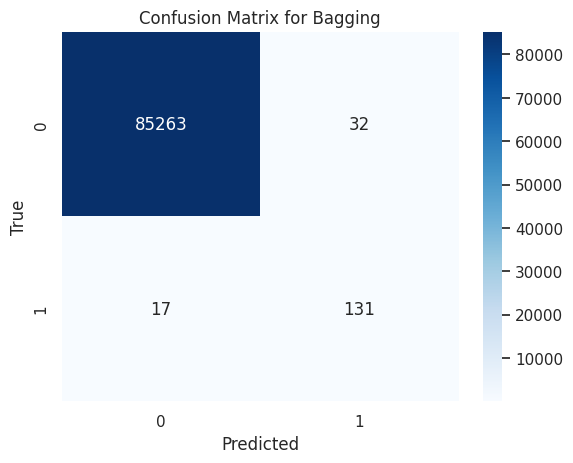

In [ ]:
# (a) 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Bagging')
plt.xlabel('Predicted')
plt.ylabel('True')

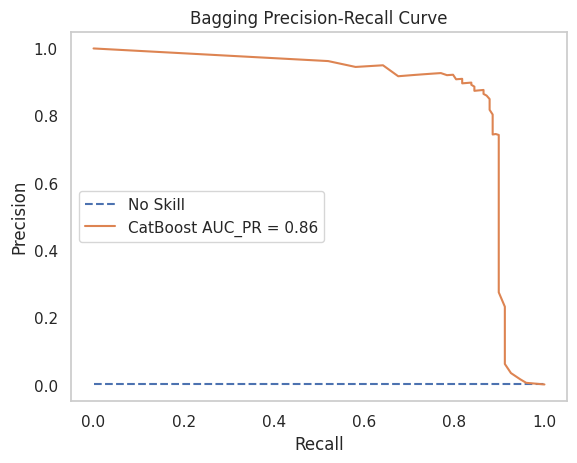

In [ ]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, label='CatBoost AUC_PR = %0.2f' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Bagging Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 定义随机森林分类器的基础估计器
base_model = RandomForestClassifier()

# 定义参数的搜索空间，使用常用的离散值
param_dist_rf = {
    'n_estimators': [10,30,50,70],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 创建RandomizedSearchCV实例
random_search_rf = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist_rf,
    n_iter=10,  # 可以根据您的计算资源调整迭代次数
    cv=3,  # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)


In [ ]:
random_search_rf.fit(X_resampled, y_resampled)
best_model_rf = random_search_rf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
random_search_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [ ]:
# dump(best_model_rf, '/content/drive/MyDrive/credit_card_fraud_detection/model/rf.joblib')

['/content/drive/MyDrive/credit_card_fraud_detection/model/rf.joblib']

In [ ]:
best_model_rf = load('/content/drive/MyDrive/credit_card_fraud_detection/model/rf.joblib')

In [ ]:
y_pred_rf = best_model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.89      0.84       148

    accuracy                           1.00     85443
   macro avg       0.89      0.95      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
print(mcc_rf)

0.8368233467423879


Text(46.25, 0.5, 'True')

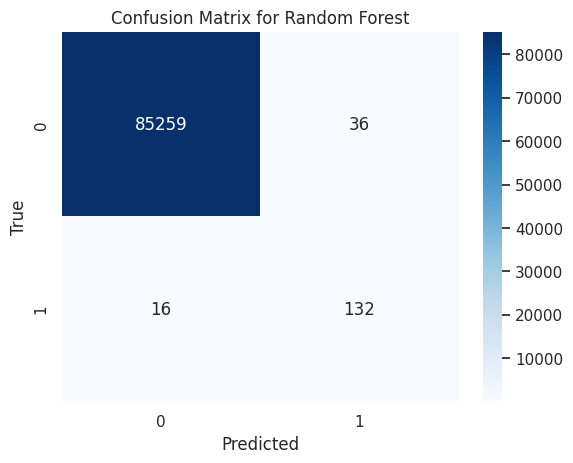

In [ ]:
# (a) 绘制混淆矩阵
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

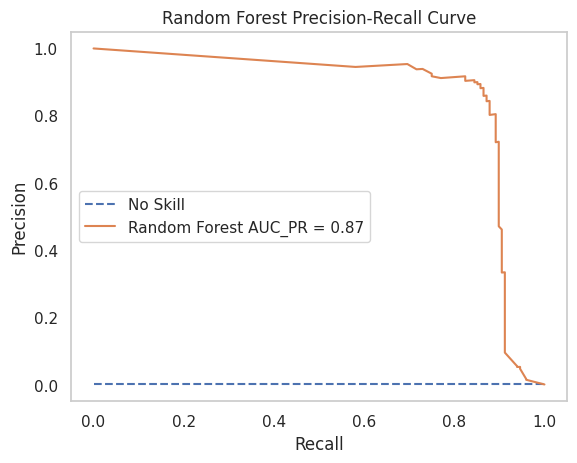

In [ ]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision_rf, recall_rf, _ = precision_recall_curve(y_test, best_model_rf.predict_proba(X_test)[:, 1])
auc_pr_rf = auc(recall_rf, precision_rf)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_rf, precision_rf, label='Random Forest AUC_PR = %0.2f' % auc_pr_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

<ipython-input-68-2be7c4449baf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


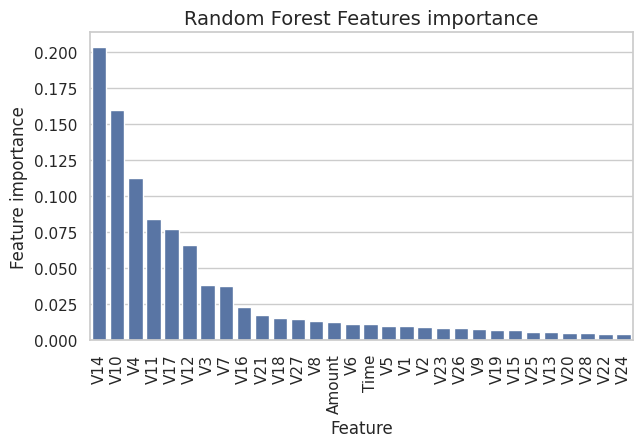

In [ ]:
# (c) 绘制特征重要性
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': best_model_rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Random Forest Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## XGBoost

In [ ]:
# XGBoost
import xgboost as xgb

# 定义XGBoost模型
base_model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 定义参数的搜索空间
param_dist_xgb = {
    'n_estimators': [50, 100, 200, 400],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# 创建RandomizedSearchCV实例
random_search_xgb = RandomizedSearchCV(
    estimator=base_model_xgb,
    param_distributions=param_dist_xgb,
    n_iter=10,  # 可以根据您的计算资源调整迭代次数
    cv=3,  # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)

In [ ]:
random_search_xgb.fit(X_resampled, y_resampled)
best_model_xgb = random_search_xgb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
random_search_xgb.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.3,
 'gamma': 0,
 'colsample_bytree': 0.5}

In [ ]:
dump(best_model_xgb, '/content/drive/MyDrive/credit_card_fraud_detection/model/xgb.joblib')

['/content/drive/MyDrive/credit_card_fraud_detection/model/xgb.joblib']

In [ ]:
best_model_xgb = load('/content/drive/MyDrive/credit_card_fraud_detection/model/xgb.joblib')

In [ ]:
y_pred_xgb = best_model_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.89      0.84       148

    accuracy                           1.00     85443
   macro avg       0.90      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
print(mcc_xgb)

0.8431419734710037


Text(46.25, 0.5, 'True')

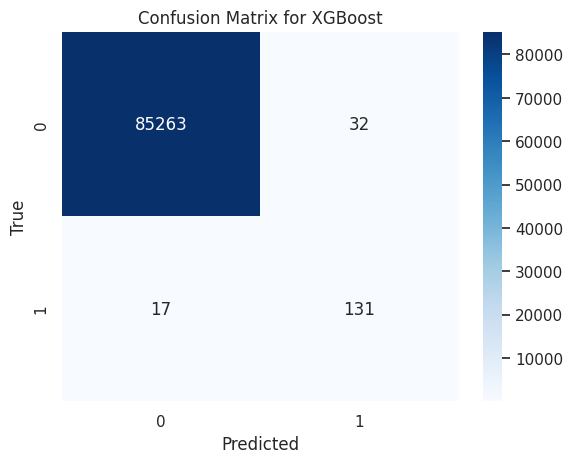

In [ ]:
# (a) 绘制混淆矩阵
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')

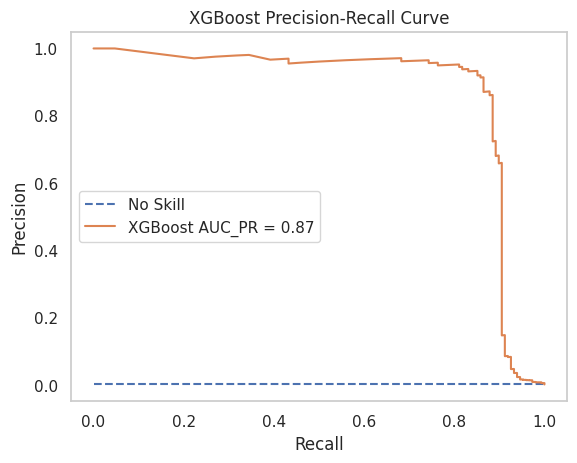

In [ ]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, best_model_xgb.predict_proba(X_test)[:, 1])
auc_pr_xgb = auc(recall_xgb, precision_xgb)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_xgb, precision_xgb, label='XGBoost AUC_PR = %0.2f' % auc_pr_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

<ipython-input-62-8e69c3b27be6>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


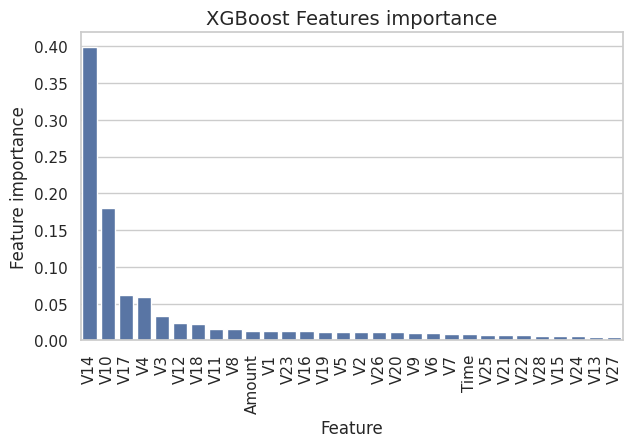

In [ ]:
# (c) 绘制特征重要性
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': best_model_xgb.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('XGBoost Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## LightGBM

In [ ]:
# LightGBM
import lightgbm as lgb

# 定义LightGBM模型
base_model_lgb = lgb.LGBMClassifier()

# 定义参数的搜索空间
param_dist_lgb = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [3, 5, 7, 9],
    'max_bin': [100, 200, 300, 500],
    'min_data_in_leaf': [20, 40, 60, 80],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'num_leaves': [31, 63, 127, 255],
    # 'colsample_by_tree': [0.5, 0.6, 0.7, 0.8]
}

# 创建RandomizedSearchCV实例
random_search_lgb = RandomizedSearchCV(
    estimator=base_model_lgb,
    param_distributions=param_dist_lgb,
    n_iter=10,  # 可以根据您的计算资源调整迭代次数
    cv=3,  # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)

In [ ]:
random_search_lgb.fit(X_resampled, y_resampled)
best_model_lgb = random_search_lgb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Info] Number of positive: 199020, number of negative: 198597
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.130820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15000
[LightGBM] [Info] Number of data points in the train set: 397617, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500532 -> initscore=0.002128
[LightGBM] [Info] Start training from score 0.002128
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
random_search_lgb.best_params_

{'subsample': 1.0,
 'num_leaves': 255,
 'n_estimators': 400,
 'min_data_in_leaf': 80,
 'max_depth': 7,
 'max_bin': 500,
 'learning_rate': 0.3}

In [ ]:
dump(best_model_lgb, '/content/drive/MyDrive/credit_card_fraud_detection/model/lgb.joblib')

['/content/drive/MyDrive/credit_card_fraud_detection/model/lgb.joblib']

In [ ]:
best_model_lgb = load('/content/drive/MyDrive/credit_card_fraud_detection/model/lgb.joblib')

In [ ]:
y_pred_lgb = best_model_lgb.predict(X_test)
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.90      0.86       148

    accuracy                           1.00     85443
   macro avg       0.92      0.95      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
mcc_lgb = matthews_corrcoef(y_test, y_pred_lgb)
print(mcc_lgb)

0.864048930995168


Text(46.25, 0.5, 'True')

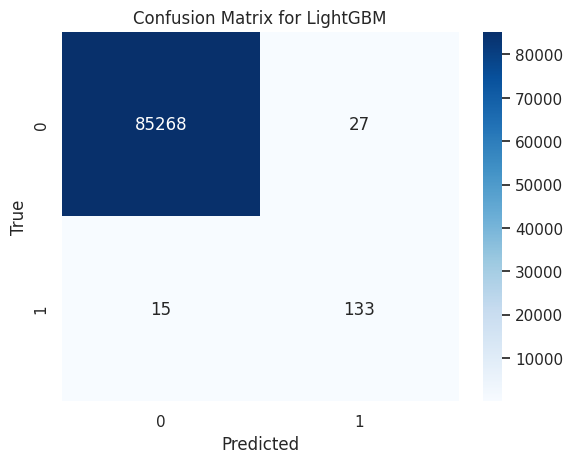

In [ ]:
# (a) 绘制混淆矩阵
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted')
plt.ylabel('True')

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80


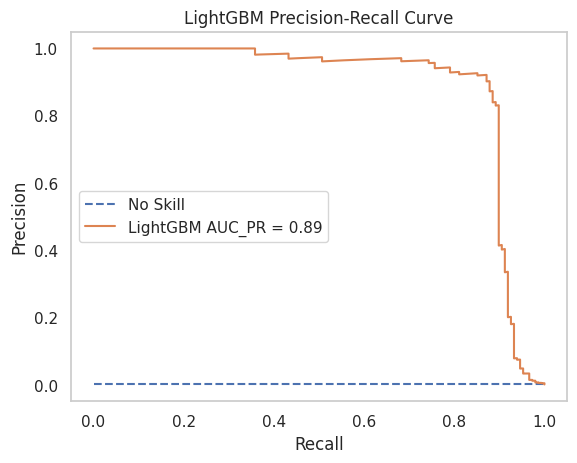

In [ ]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, best_model_lgb.predict_proba(X_test)[:, 1])
auc_pr_lgb = auc(recall_lgb, precision_lgb)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_lgb, precision_lgb, label='LightGBM AUC_PR = %0.2f' % auc_pr_lgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

<ipython-input-56-667c4c0330af>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


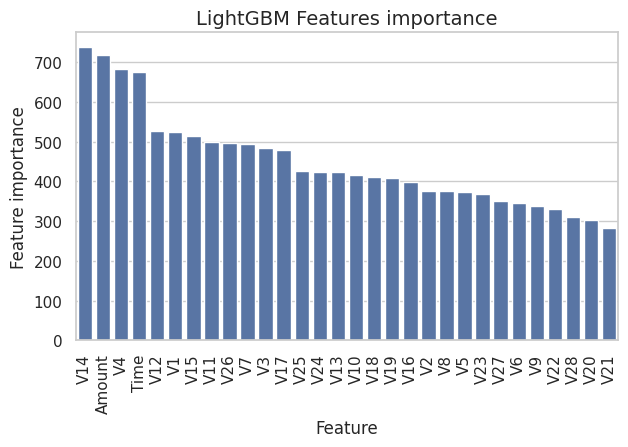

In [ ]:
# (c) 绘制特征重要性
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': best_model_lgb.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('LightGBM Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.4 MB/s eta 0:00:00


In [ ]:
# CatBoost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV

# 定义CatBoost模型
base_model_cbt = CatBoostClassifier()

# 定义参数的搜索空间
param_dist_cbt = {
    'iterations': [100, 500, 1000, 2000],  # 常用的迭代次数
    'depth': [3, 4, 5, 6],  # 树的最大深度
    'learning_rate': [0.1, 0.2, 0.3, 0.4],  # 学习率
    'l2_leaf_reg': [0.5, 1.0, 1.5, 2.0]  # 控制过拟合的正则化参数
}

# 创建RandomizedSearchCV实例
random_search_cbt = RandomizedSearchCV(
    estimator=base_model_cbt,
    param_distributions=param_dist_cbt,
    n_iter=10,  # 可以根据您的计算资源调整迭代次数
    cv=3,  # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)

In [ ]:
random_search_cbt.fit(X_resampled,y_resampled)
best_model_cbt = random_search_cbt.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.3641700	total: 300ms	remaining: 5m
1:	learn: 0.2278173	total: 539ms	remaining: 4m 28s
2:	learn: 0.1785224	total: 681ms	remaining: 3m 46s
3:	learn: 0.1543495	total: 792ms	remaining: 3m 17s
4:	learn: 0.1332972	total: 905ms	remaining: 3m
5:	learn: 0.1197492	total: 1.04s	remaining: 2m 52s
6:	learn: 0.1066048	total: 1.16s	remaining: 2m 44s
7:	learn: 0.0999738	total: 1.28s	remaining: 2m 38s
8:	learn: 0.0918712	total: 1.39s	remaining: 2m 33s
9:	learn: 0.0836244	total: 1.51s	remaining: 2m 29s
10:	learn: 0.0762920	total: 1.63s	remaining: 2m 26s
11:	learn: 0.0718343	total: 1.75s	remaining: 2m 23s
12:	learn: 0.0686805	total: 1.86s	remaining: 2m 21s
13:	learn: 0.0639484	total: 2s	remaining: 2m 21s
14:	learn: 0.0601121	total: 2.11s	remaining: 2m 18s
15:	learn: 0.0561921	total: 2.23s	remaining: 2m 17s
16:	learn: 0.0530727	total: 2.34s	remaining: 2m 15s
17:	learn: 0.0497723	total: 2.46s	remaining: 2m 14s
18:	learn: 0.0462028	tot

In [ ]:
random_search_cbt.best_params_

{'learning_rate': 0.2, 'l2_leaf_reg': 1.5, 'iterations': 1000, 'depth': 6}

In [ ]:
dump(best_model_cbt, '/content/drive/MyDrive/credit_card_fraud_detection/model/cbt.joblib')

['/content/drive/MyDrive/credit_card_fraud_detection/model/cbt.joblib']

In [ ]:
# best_model_cbt = load('/content/drive/MyDrive/credit_card_fraud_detection/model/cbt.joblib')

In [ ]:
test_pool = Pool(X_test,y_test)
y_pred_cbt = best_model_cbt.predict(test_pool)
print(classification_report(y_test, y_pred_cbt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.64      0.89      0.75       148

    accuracy                           1.00     85443
   macro avg       0.82      0.95      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
mcc_cbt = matthews_corrcoef(y_test, y_pred_cbt)
print(mcc_cbt)

0.7555000749353235


Text(46.25, 0.5, 'True')

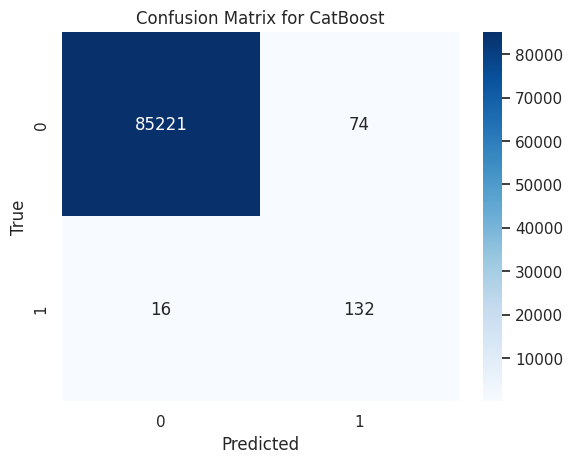

In [ ]:
# (a) 绘制混淆矩阵
cm_cbt = confusion_matrix(y_test, y_pred_cbt)
sns.heatmap(cm_cbt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CatBoost')
plt.xlabel('Predicted')
plt.ylabel('True')

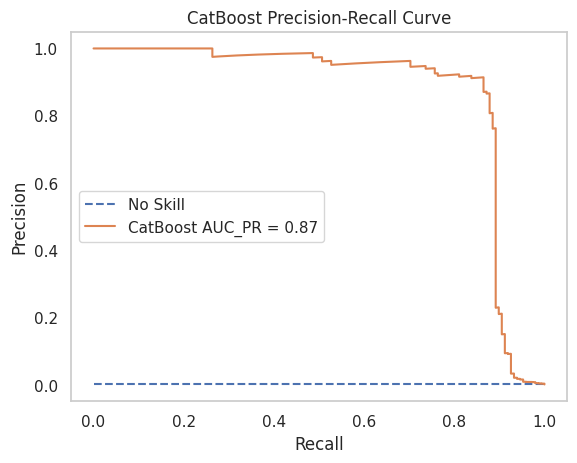

In [ ]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision_cbt, recall_cbt, _ = precision_recall_curve(y_test, best_model_cbt.predict_proba(X_test)[:, 1])
auc_pr_cbt = auc(recall_cbt, precision_cbt)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_cbt, precision_cbt, label='CatBoost AUC_PR = %0.2f' % auc_pr_cbt)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('CatBoost Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

<ipython-input-50-35caceb64aea>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


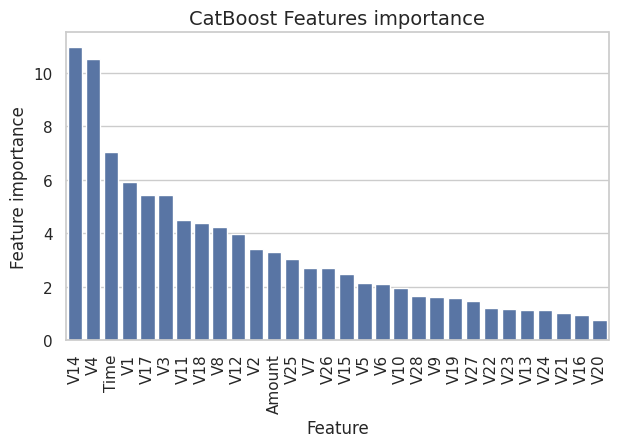

In [ ]:
# (c) 绘制特征重要性
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': best_model_cbt.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('CatBoost Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.